In [0]:
import IPython.display as ipd
import numpy as np
from scipy.signal import hilbert
from scipy.fftpack import fft, fftshift, fftfreq, ifft
import matplotlib.pyplot as plt

In [0]:
# Creation d'une sinusoide a 1kHz echantillonée à 4kHz
fsignal = 1000
fs = 4000
duration = 1.0
t = np.arange(0.0,duration,1.0/fs)
signal = np.cos(2.0*np.pi*fsignal*t)

In [3]:
ipd.Audio(signal, rate=fs) 

Text(0.5, 0, 'time in seconds')

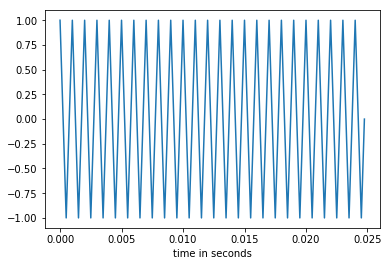

In [4]:
# Affichage du signal genere sur quelques periodes
plt.plot(t[0:100], signal[0:100], label='signal')
plt.xlabel("time in seconds")

-1000 Hz module: 2000.000000 phase: 0.000000
1000 Hz module: 2000.000000 phase: -0.000000


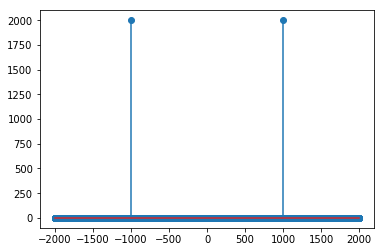

In [5]:
# FFT de la sinusoide de  1kHz echantillon à 4kHz ramenée entre -2kHz et 2kHz
f = fftfreq(fs,duration)
f = fftshift(f)*fs
y = fftshift(fft(signal))
plt.stem(f, np.abs(y))
print("-1000 Hz module: %f phase: %f" % (np.abs(y[1000]), np.angle(y[1000])))
print("1000 Hz module: %f phase: %f" % (np.abs(y[3000]), np.angle(y[3000])))

1000 Hz module: 4000.000000 phase: -0.000000


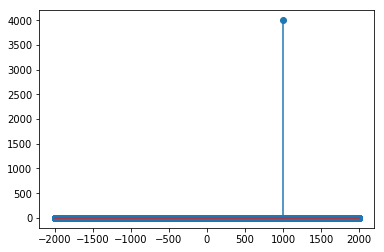

In [6]:
# Calcul du signal analytique (complexe) associé à la sinusoide de 1kHz
analytic_signal = hilbert(signal)

# Affichage de la FFT du signal analytique de la sinusoide 1kHz ramenée entre -2kHz et 2kHz
f = fftfreq(fs,duration)
f = fftshift(f)*fs
y = fftshift(fft(analytic_signal))
plt.stem(f, np.abs(y))
print("1000 Hz module: %f phase: %f" % (np.abs(y[3000]), np.angle(y[3000])))

Pour obtenir le signal analytique, il faut appliquer un filtre tel que $\displaystyle \mathcal {H}$(f )= 2 si f > 0 , $\displaystyle \mathcal {H}$(f ) = 0 si f < 0 et $\displaystyle \mathcal {H}$(f ) = 1 si f = 0  , soit $\displaystyle \mathcal {H}$(f ) = 1 + sgn(f ) 


voir https://fr.wikipedia.org/wiki/Signal_analytique et https://en.wikipedia.org/wiki/Analytic_signal

In [0]:
# Calcul à partir du signal analytique (complexe) a partir du signal reel
N = signal.shape[0]
# FFT du signal reel
Xf=fft(signal,N)
# Calcul du filtre H dans le domaine frequentiel
h = np.zeros(N)
if N % 2 == 0:
  h[0] = h[N // 2] = 1
  h[1:N // 2] = 2
else:
  h[0] = 1
  h[1:(N + 1) // 2] = 2
# Application du filtre dans le domaine frequentiel par multiplication
# IFFT pour revenir dans le domaine temporel
xa = ifft(Xf * h)

1000 Hz module: 4000.000000 phase: -0.000000


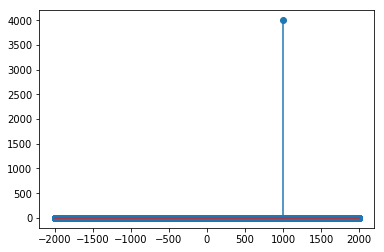

In [8]:
# FFT du signal analytique calculé au dessus
f = fftfreq(fs,duration)
f = fftshift(f)*fs
y = fftshift(fft(xa))
plt.stem(f, np.abs(y))
print("1000 Hz module: %f phase: %f" % (np.abs(y[3000]), np.angle(y[3000])))

In [9]:
( xa  == analytic_signal ).all()

True

In [10]:
# Le signal est reel => sa FFT est symetrique (Symetrie Hermitienne)
type(signal[0])

numpy.float64

In [11]:
# le signal analytique est complexe => sa FFT n'est pas forcement symetrique
type(xa[0])

numpy.complex128

-1000 Hz module: 2000.000000 phase: 1.570796
1000 Hz module: 2000.000000 phase: -1.570796


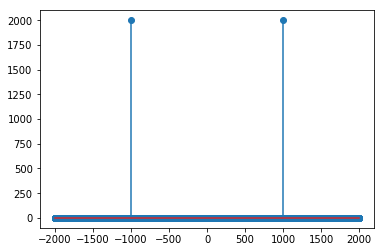

In [12]:
thilbert = 1j*(signal- analytic_signal)
f = fftfreq(fs,duration)
f = fftshift(f)*fs
y = fftshift(fft(thilbert))
plt.stem(f, np.abs(y))
print("-1000 Hz module: %f phase: %f" % (np.abs(y[1000]), np.angle(y[1000])))
print("1000 Hz module: %f phase: %f" % (np.abs(y[3000]), np.angle(y[3000])))

1000 Hz module: 4000.000000 phase: -0.000000


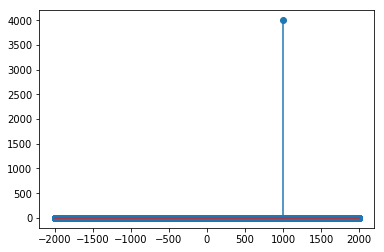

In [14]:
# En electronique, on utilise  A.exp(jwt) à la place A.cos(wt) 
# A.exp(jwt) est la representation analytique de A.cos(wt) voir https://en.wikipedia.org/wiki/Phasor
# Cette representation analytique n'a pas de frequence negative et ressemble furieusement au signal analytique


analytic_representation = np.exp(2.0*1j*np.pi*fsignal*t)
# FFT de la representation analytique
f = fftfreq(fs,duration)
f = fftshift(f)*fs
y = fftshift(fft(analytic_representation))
plt.stem(f, np.abs(y))
print("1000 Hz module: %f phase: %f" % (np.abs(y[3000]), np.angle(y[3000])))